# This notebook simulates a toy dataset of forecasters making predictions for economic indicators.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# parameters
p = 5 # number of forecasters
M = 3 # number of indicators
T = 20 # number of periods
np.random.seed(42)

# --- True skill of forecasters ---
# Lower = better, controlling forecast noise
true_skill = np.linspace(0.8, 1.2, p)

In [5]:

# --- Simulate forecasts and realizations ---
data = []
for j in range(p):
    for m in range(M):
        for t in range(T):
            realized = np.random.normal(0, 1)
            forecast = realized + np.random.normal(0, true_skill[j])
            data.append([f'F{j+1}', f'Ind{m+1}', t+1, forecast, realized])



In [6]:
df = pd.DataFrame(data, columns=["forecaster", "indicator", "period", "forecast", "realized"])


In [7]:
# --- Compute forecast errors ---
df["error"] = df["forecast"] - df["realized"]
df["squared_error"] = df["error"]**2


In [8]:
df.head()

,forecaster,indicator,period,forecast,realized,error,squared_error
0,F1,Ind1,1,0.386103,0.496714,-0.110611,0.012235
1,F1,Ind1,2,1.866112,0.647689,1.218424,1.484557
2,F1,Ind1,3,-0.421463,-0.234153,-0.187310,0.035085
3,F1,Ind1,4,2.193161,1.579213,0.613948,0.376932
4,F1,Ind1,5,-0.035426,-0.469474,0.434048,0.188398


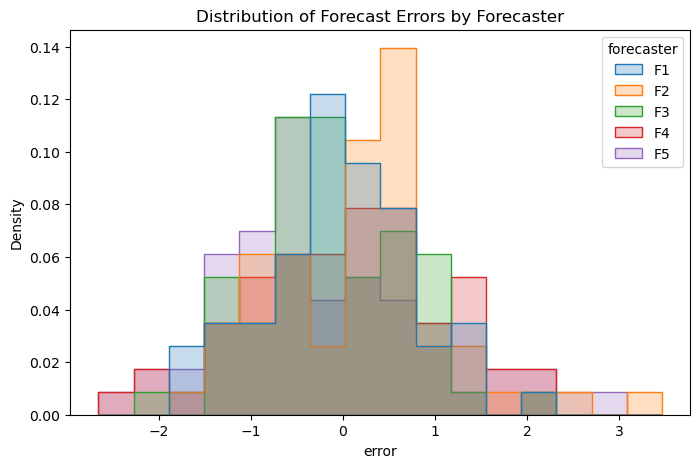

In [9]:
# --- Plot distribution of forecast errors ---
plt.figure(figsize=(8, 5))
sns.histplot(df, x="error", hue="forecaster", element="step", stat="density")
plt.title("Distribution of Forecast Errors by Forecaster")
plt.show()


In [10]:
# --- Compute mean squared forecast error (MSFE) per forecaster ---
msfe = df.groupby("forecaster")["squared_error"].mean().reset_index()
msfe = msfe.rename(columns={"squared_error": "MSFE"})
print(msfe)



  forecaster      MSFE
0         F1  0.605878
1         F2  0.977196
2         F3  0.649940
3         F4  1.095245
4         F5  1.367791


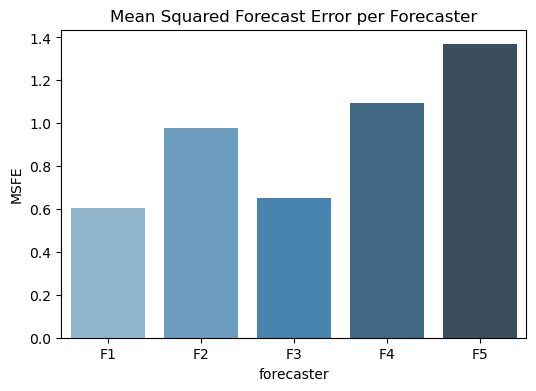

In [11]:
# --- Plot average MSFE ---
plt.figure(figsize=(6, 4))
sns.barplot(data=msfe, x="forecaster", y="MSFE", palette="Blues_d")
plt.title("Mean Squared Forecast Error per Forecaster")
plt.show()

In [ ]:

# --- Save dataset in data/toy_dataset.csv ---
df.to_csv("../data/toy_dataset.csv", index=False)
print("Toy dataset saved as toy_dataset.csv in data folder.")

Toy dataset saved as toy_dataset.csv
